In [1]:
# buoy ellipse using PyTMD
# https://pytmd.readthedocs.io/en/latest/api_reference/ellipse.html
import requests
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import tz
import matplotlib.pyplot as plt 
from pyTMD import ellipse
# script, currently in same directory
from read_buoy import read_buoy
from tide_ellipse import get_params

In [2]:
# Tide correction for amplitude and phase set to April 19, 2024 from:
# https://tidesandcurrents.noaa.gov/harcon.html?id=8574680
# The freq parameter it the frequency of the tidal consituent in degrees/hour.
CorrTides = {
    'reftime': datetime(2024, 4, 19, tzinfo=tz.tzutc()),
    'K1': {
        'freq': 15.041069000,
        'ft': 0.21,
        'uvt': 7.0},
    'O1': {
        'freq': 13.943035,
        'ft': 0.18,
        'uvt': 14.0},
    'Q1': {
        'freq': 13.398661,
        'ft': 0.04,
        'uvt': 358.5},
    'P1': {
        'freq': 14.958931,
        'ft': 0.07,
        'uvt': 2.2},
    'M2': {
        'freq': 28.984104,
        'ft': 0.5,
        'uvt': 336.3},
    'N2': {
        'freq': 28.43973,
        'ft': 0.11,
        'uvt': 313.1},
    'S2': {
        'freq': 30.0,
        'ft': 0.08,
        'uvt': 8.3},
    'K2': {
        'freq': 30.082138,
        'ft': 0.03,
        'uvt': 8.9}
    }

# read in buoy data

In [3]:
buoy = read_buoy(buoy_id="cb1501", start_date="20240401", end_date="20240415")
buoy.head()

,hours from start,Speed,Direction (original),"Direction (radians, CCW from East)",v,u
2024-04-05 15:33:00,0.0,0.185,127.0,-0.645772,-0.111336,0.147748
2024-04-05 15:39:00,0.1,0.157,120.0,-0.523599,-0.078500,0.135966
2024-04-05 15:45:00,0.2,0.161,114.0,-0.418879,-0.065485,0.147081
2024-04-05 15:51:00,0.3,0.189,122.0,-0.558505,-0.100155,0.160281
2024-04-05 15:57:00,0.4,0.189,107.0,-0.296706,-0.055258,0.180742


In [4]:
#umajor,uminor,uincl,uphase = ellipse.ellipse(buoy['u'],buoy['v'])

# get ellipse parameters 

In [7]:
ellipse = get_params(buoy['u'],buoy['v'],buoy['hours from start'],8,CorrTides)

In [11]:
ellipse

{'M2': {'Semi-Major Axis': 0.10185008769211963,
  'Semi-Minor Axis': 0.06835445095604296,
  'Inclination': 145.76302775693352,
  'Phase': 39.58010365235816},
 'K1': {'Semi-Major Axis': 1.1428724731738609,
  'Semi-Minor Axis': -0.2245343126687927,
  'Inclination': 76.21322554467292,
  'Phase': 127.2585519863801},
 'S2': {'Semi-Major Axis': 0.525604937522236,
  'Semi-Minor Axis': 0.15224622195545295,
  'Inclination': 157.457705333773,
  'Phase': 347.01784575334364},
 'O1': {'Semi-Major Axis': 0.19330953039673587,
  'Semi-Minor Axis': -0.045206085320182984,
  'Inclination': 99.74287846825837,
  'Phase': 332.844901982437},
 'N2': {'Semi-Major Axis': 0.09323822236111189,
  'Semi-Minor Axis': 0.001741497497155492,
  'Inclination': 90.70035803546875,
  'Phase': 72.95382474960189},
 'P1': {'Semi-Major Axis': 1.2148633840183385,
  'Semi-Minor Axis': -0.2871862479642004,
  'Inclination': 78.38431672883587,
  'Phase': 295.6464269196242},
 'K2': {'Semi-Major Axis': 0.5169141700550858,
  'Semi-Mino

In [18]:
speed = {}#np.zeros_like(buoy['hours from start'])
for const in [*ellipse]:
    amp = ellipse[const]['Semi-Major Axis']
    ph = ellipse[const]['Phase']
    inclination = ellipse[const]['Inclination']
    speed[const] = amp * np.cos(2 * np.pi * buoy['hours from start'] / 12.42 - ph)

M2
K1
S2
O1
N2
P1
K2
Q1


# reconstruct current to test method 

Text(0.5, 0, 'hours')

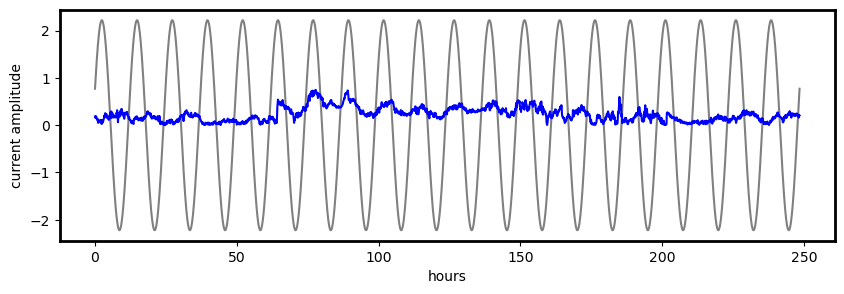

In [23]:
all_const = speed["M2"] + speed["K1"] + speed["S2"]  + speed["O1"] + speed["N2"] + speed["P1"] + speed["K2"] + speed["Q1"]
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(buoy['hours from start'], all_const ,color = 'grey')
ax.plot(buoy['hours from start'], buoy['Speed'] ,color = 'blue')
#ax.plot(hours[0:-1:interval], u[0:-1:interval], color='g', marker='o')
ax.set_ylabel('current amplitude')
ax.set_xlabel('hours')
#plt.savefig(f'fake_amplitude.png')

In [ ]:
###  Hmmmm....my method for reconstructing is flawed. 

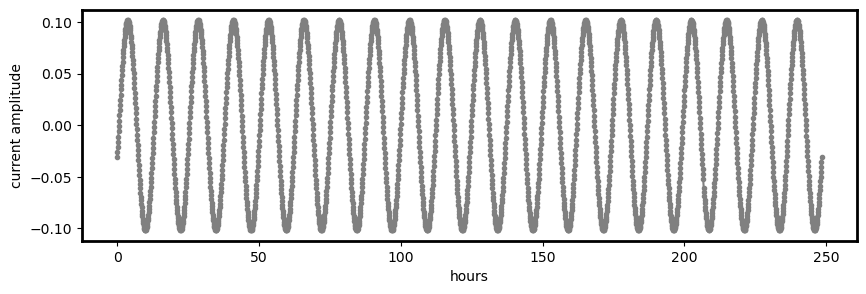

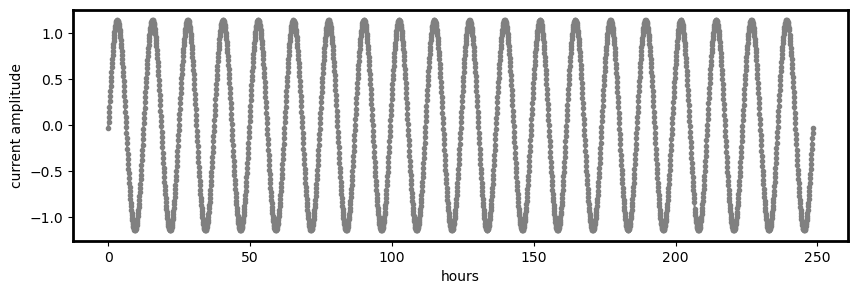

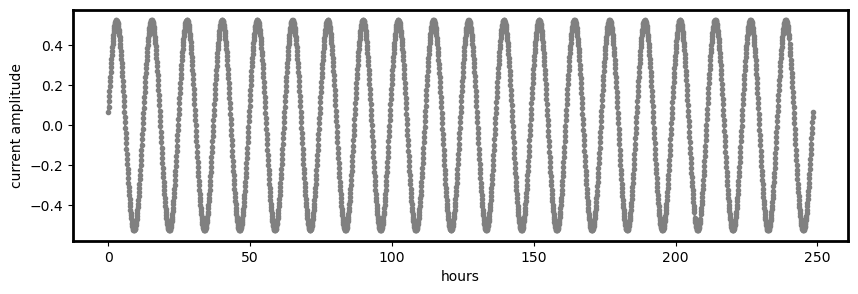

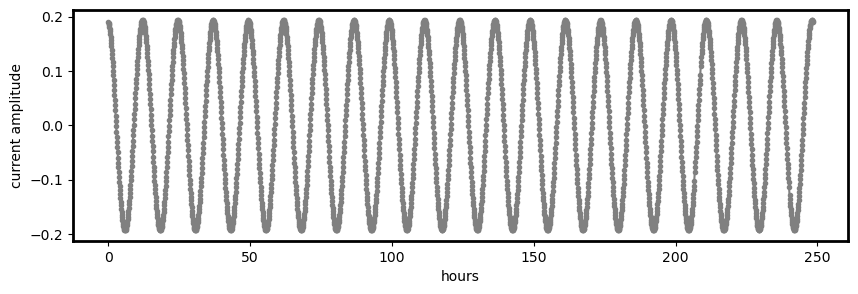

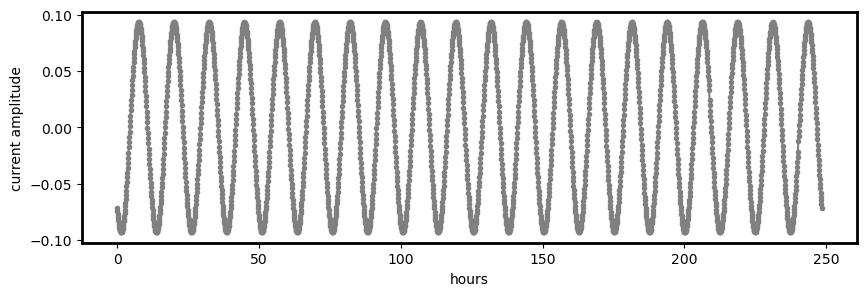

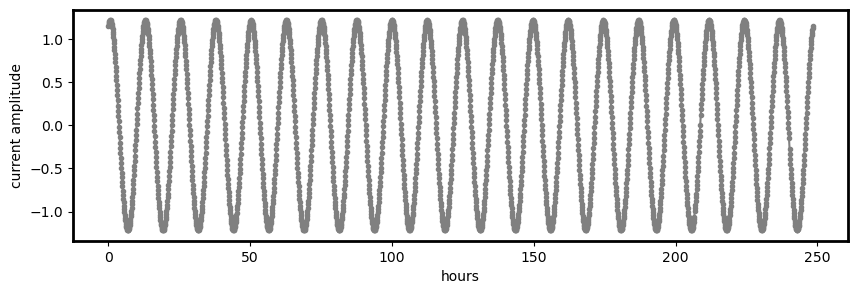

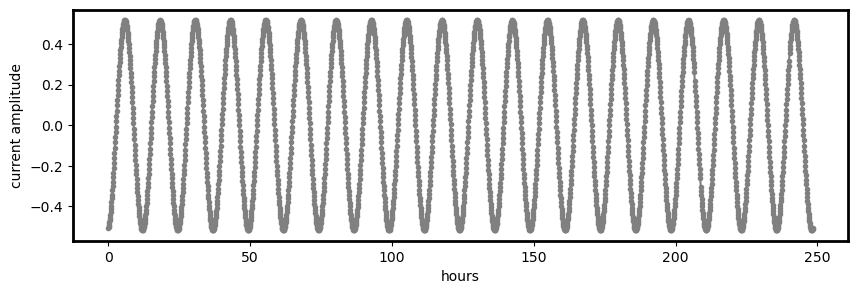

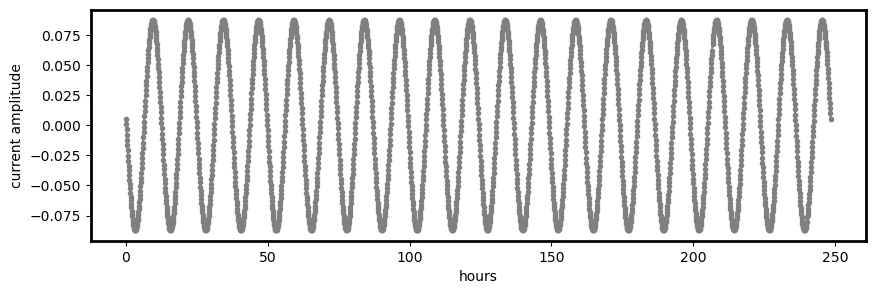

In [19]:
# # plot comparison
# for const in [*ellipse]:
#     fig,ax = plt.subplots(1,1,figsize=(10,3))
#     ax.plot(buoy['hours from start'],speed[const],color = 'grey', marker='.')
#     #ax.plot(hours[0:-1:interval], u[0:-1:interval], color='g', marker='o')
#     ax.set_ylabel('current amplitude')
#     ax.set_xlabel('hours')
#     #plt.savefig(f'fake_amplitude.png')